In [2]:
from utils import Utils
import pyreadr
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import openai
import os
from sklearn.tree import DecisionTreeClassifier,plot_tree,export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.stats import chi2_contingency

%matplotlib inline

In [3]:
url ="https://github.com/qsideinstitute/DATA2LIFT/blob/main/RawData/PUMSRawData.Rdata"
Utils.download_file(url)

File downloaded successfully. File name: PUMSRawData.Rdata


True

In [4]:
result = pyreadr.read_r('./data/data.rdata')
data = result['rawPumsData']
df = pd.DataFrame(data)
df.head(3)

,SERIALNO,SPORDER,WGTP,PWGTP,AGEP,PUMA,ST,SCH,SEX,ESR,HISP,RAC1P
0,2021GQ0000026,1.0,0.0,13.0,85.0,00800,01,1,1,6,01,1
1,2021GQ0000031,1.0,0.0,51.0,67.0,00800,01,1,2,6,01,2
2,2021GQ0000063,1.0,0.0,17.0,74.0,01200,01,1,1,6,01,1


In [5]:

subset_df = df[['SEX', 'RAC1P', 'AGEP']]

age_bins = [0, 17, 34, 49, df['AGEP'].max()]
age_labels = ['0-17', '18-34', '35-49', '50+']
subset_df['AGE_GROUP'] = pd.cut(subset_df['AGEP'], bins=age_bins, labels=age_labels)

contingency_table = pd.crosstab(index=[subset_df['SEX'], subset_df['RAC1P']], columns=subset_df['AGE_GROUP'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-squared test statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)


/var/folders/pp/ky6gnf7x3w901t4hrc3hznnc0000gn/T/ipykernel_21436/3693664041.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['AGE_GROUP'] = pd.cut(subset_df['AGEP'], bins=age_bins, labels=age_labels)


Chi-squared test statistic: 106668.34037170089
p-value: 0.0
Degrees of freedom: 51


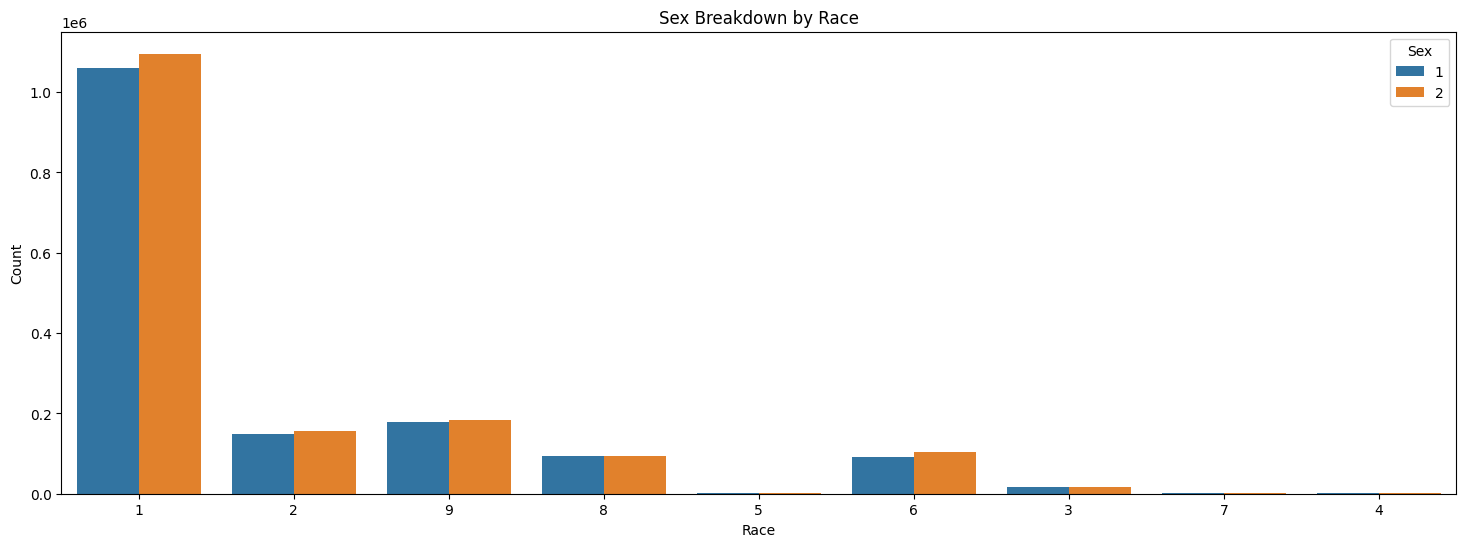

In [6]:

plt.figure(figsize=(18, 6))
sns.countplot(data=df, x='RAC1P', hue='SEX')
plt.title('Sex Breakdown by Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.legend(title='Sex', loc='upper right')
plt.show()


/Users/teddyoweh/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/pp/ky6gnf7x3w901t4hrc3hznnc0000gn/T/ipykernel_21436/2624407992.py:26: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1800x600 with 0 Axes>

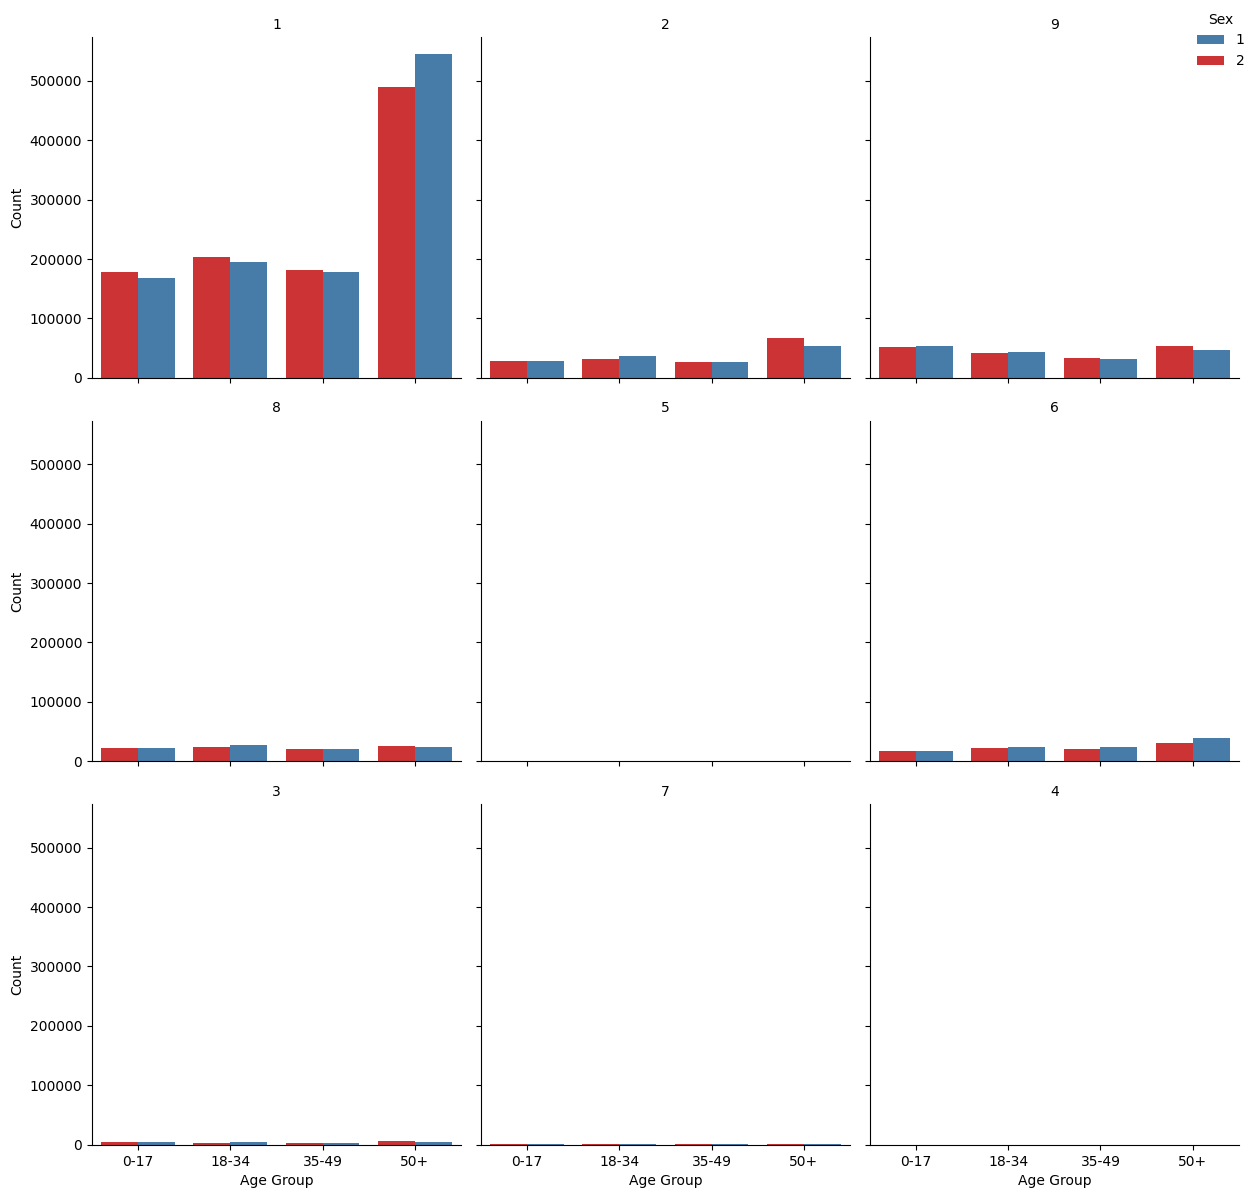

In [9]:


age_bins = [0, 17, 34, 49, df['AGEP'].max()]
age_labels = ['0-17', '18-34', '35-49', '50+']
df['AGE_GROUP'] = pd.cut(df['AGEP'], bins=age_bins, labels=age_labels)

contingency_table = pd.pivot_table(df, 
                                   index='SEX', 
                                   columns=['RAC1P', 'AGE_GROUP'], 
                                   aggfunc='size', 
                                   fill_value=0)

 


plt.figure(figsize=(18, 6))
grid = sns.FacetGrid(df, col='RAC1P', col_wrap=3, height=4)
grid.map_dataframe(sns.countplot, x='AGE_GROUP', hue='SEX', palette='Set1')
grid.set_axis_labels('Age Group', 'Count')
grid.set_titles('{col_name}')
grid.add_legend(title='Sex', loc='upper right')
plt.tight_layout()
plt.show()
